# Data Science and Business Analytics Internship at The Sparks Foundation

# TASK 1: Prediction using Supervised Machine Learning

Predict the percentage of an student based on the number of study hours.

# Steps of Model Building

Algorithm Selection ----> Training Model ----> Prediction/Scoring

AUTHOR- PRANJAL GUPTA

# Importing the Dataset

In [1]:
#Importing the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the dataset
url="http://bit.ly/w-data"
data=pd.read_csv(url)

In [3]:
#Viewing the first few rows using head
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
#Dimensions of Dataset
data.shape

(25, 2)

In [6]:
#Generates descriptive statistics
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#Detect all the Missing Values
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [8]:
#Calculate the sum of missing values in a particular column 
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Plotting the Dataset

Visualizing the dataset

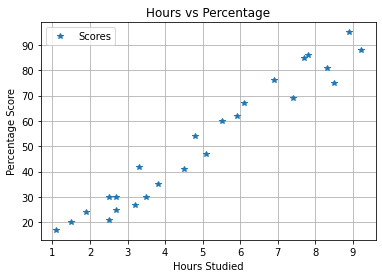

In [9]:
data.plot(x='Hours',y='Scores',style='*')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

# Preparation of Data

In this dataset we only have two columns. We want to predict the percentage score depending upon the hours studied.
Therefore our attribute set will consist of the "Hours" column and the label will be the "Score" column.
To extract the attributes and labels, we use the following lines:

In [10]:
#Making train and test Dataset
X=data.iloc[:,:-1].values
Y=data.iloc[:,1].values

In [11]:
#spliting the data into training and testing data

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

# Training the Algorithm

Now, We have split our data into training and testing sets, and now it's time to train our algorithm

In [12]:
#Linear Regression is used for Regression problems.It is a statistical approach for modelling relationship between a dependent variable with a given set of independent variables 

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

#To retrieve the intercept:
print(model.intercept_)

2.018160041434683


In [13]:
#For retrieving the slope
print(model.coef_)

[9.91065648]


# Visualizing the model

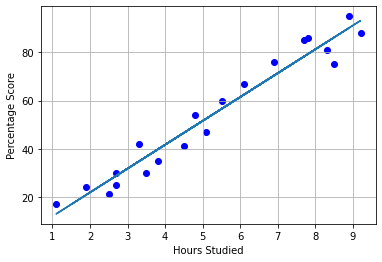

In [14]:
line = model.coef_*X+model.intercept_

#Plotting for the training data
plt.scatter(X_train,Y_train,color='blue')
plt.plot(X,line)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

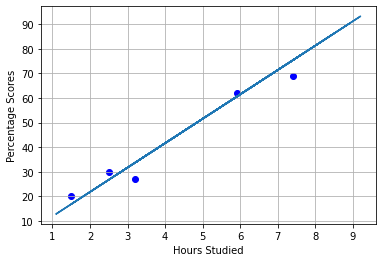

In [15]:
#Plotting for the test data
plt.scatter(X_test,Y_test,color='blue')
plt.plot(X,line)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.grid()
plt.show()

# Making the Predictions

Prediction is a process to estimate/predict dependent variable of test data set by applying model rules

In [16]:
#testing data(in hours)
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [17]:
Y_predicted=model.predict(X_test)

#Comparing the actual and predicted
df=pd.DataFrame({'Actual Score':Y_test,'Predicted Score':Y_predicted})
print(df) 

   Actual Score  Predicted Score
0            20        16.884145
1            27        33.732261
2            69        75.357018
3            30        26.794801
4            62        60.491033


In [18]:
#Predicting score for 9.25 hours
hours=9.25
pred=model.predict([[hours]]) 
print("The predicted score if a person studies for",hours,"hours is",pred[0])    

The predicted score if a person studies for 9.25 hours is 93.69173248737538


# Evaluating the Algorithm

In [19]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,Y_predicted))    

Mean Absolute Error: 4.183859899002975


In [20]:
print('Mean Squared Error:',metrics.mean_squared_error(Y_test,Y_predicted))    

Mean Squared Error: 21.5987693072174


In [21]:
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(Y_test,Y_predicted)))

Root Mean Squared Error: 4.6474476121003665
